<a href="https://colab.research.google.com/github/sgadkar2/machine-learning-algorithms/blob/main/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing libraries**

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

### **Generating Input**

In [ ]:
x = torch.cat((torch.arange(1992,2012), torch.arange(2019,2024)), -1)
y_min = torch.tensor([8730, 8781, 9449, 10224, 10575, 11070,
                      11485, 11845, 11580, 11960, 12565, 13645,
                      14575, 14610, 14450, 13970, 14490, 16395,
                      17820, 18160, 24000, 24110, 24820, 25980, 27400])
y_max = torch.tensor([14840, 16535, 18328, 19571, 20295, 20325,
                      19695, 19435, 19785, 24335, 25010, 25450,
                      26015, 26795, 26670, 24425, 24350, 25805,
                      25800, 26070, 38565, 38675, 39035, 39730, 40945])

### **Computing output**

In [ ]:
def compute_output(x, theta_0, theta_1):
  return theta_0 + torch.mul(theta_1, x)

### **Computing total loss**

In [ ]:
def compute_loss(x, y, theta_0, theta_1):

  m = x.shape[0]
  loss = 0
  f_x = compute_output(x, theta_0, theta_1)

  for i in range(m):

    loss = loss + (f_x[i] - y[i])**2

  total_loss = loss / (2 * m)

  return total_loss

### **Computing gradient descent**

In [ ]:
def gradient_descent(x, y, theta_0_initial, theta_1_initial, alpha):
  iterations = 100
  total_loss = np.empty(100)
  m = x.shape[0]
  theta_0 = theta_0_initial
  theta_1 = theta_1_initial

  for i in range(iterations):

    f_x = compute_output(x, theta_0, theta_1)
    total_loss[i] = compute_loss(x, y, theta_0, theta_1)

    print(f"After Iteration {i+1} loss is {total_loss[i]}")

    dj_dtheta_0 = 0
    dj_dtheta_1 = 0

    for i_2 in range(m):
      dj_dtheta_0 = dj_dtheta_0 + f_x[i_2] - y[i_2]
      dj_dtheta_1 = dj_dtheta_1 + (f_x[i_2] - y[i_2]) * x[i_2]

    dj_dtheta_0 = dj_dtheta_0 / m
    dj_dtheta_1 = dj_dtheta_1 / m

    theta_0 = theta_0 - (alpha * dj_dtheta_0)
    theta_1 = theta_1 - (alpha * dj_dtheta_1)

  return theta_0, theta_1, total_loss

### **Running linear regression for Minimum car price**

In [ ]:
#Invoking linear regression for minimum car price
theta_0_min = 2500
theta_1_min = 5
alpha = 0.0000001
theta_0_min, theta_1_min, total_loss_min = gradient_descent(x, y_min, theta_0_min, theta_1_min, alpha)


After Iteration 1 loss is 19048172.0
After Iteration 2 loss is 16518636.0
After Iteration 3 loss is 15614582.0
After Iteration 4 loss is 15291475.0
After Iteration 5 loss is 15175995.0
After Iteration 6 loss is 15134725.0
After Iteration 7 loss is 15119974.0
After Iteration 8 loss is 15114703.0
After Iteration 9 loss is 15112819.0
After Iteration 10 loss is 15112145.0
After Iteration 11 loss is 15111904.0
After Iteration 12 loss is 15111818.0
After Iteration 13 loss is 15111786.0
After Iteration 14 loss is 15111777.0
After Iteration 15 loss is 15111773.0
After Iteration 16 loss is 15111771.0
After Iteration 17 loss is 15111771.0
After Iteration 18 loss is 15111770.0
After Iteration 19 loss is 15111770.0
After Iteration 20 loss is 15111770.0
After Iteration 21 loss is 15111770.0
After Iteration 22 loss is 15111770.0
After Iteration 23 loss is 15111771.0
After Iteration 24 loss is 15111772.0
After Iteration 25 loss is 15111770.0
After Iteration 26 loss is 15111771.0
After Iteration 27 lo

### **Running linear regression for Maximum car price**

In [ ]:
#Invoking linear regression for Maximum car price
theta_0_max = 6000
theta_1_max = 10
alpha = 0.0000001
theta_0_max, theta_1_max, total_loss_max = gradient_descent(x, y_max, theta_0_max, theta_1_max, alpha)

### **Plotting graph for total loss of minimum costs and iteration number**

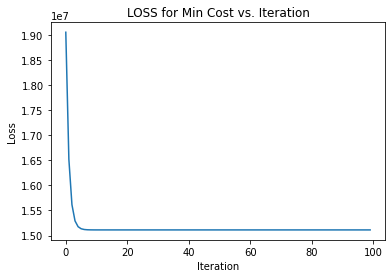

In [ ]:
plt.plot(np.arange(0,100), total_loss_min[0:100])
plt.title("LOSS for Min Cost vs. Iteration");
plt.ylabel('Loss')
plt.xlabel('Iteration')

plt.show()

### **Plotting graph for total loss of maximum costs and iteration number**

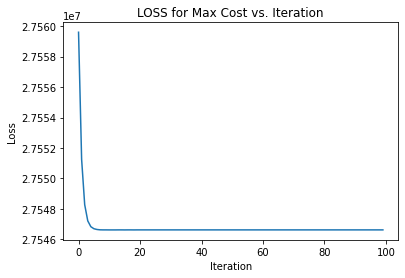

In [ ]:
plt.plot(np.arange(0,100), total_loss_max[0:100])
plt.title("LOSS for Max Cost vs. Iteration");
plt.ylabel('Loss')
plt.xlabel('Iteration')

plt.show()

### **Printing final Theta values for min and max Costs**

In [ ]:
print(f'Final theta_0 value for Min price is {theta_0_min}')
print(f'Final theta_1 value for Min price is {theta_1_min}')
print(f'Final theta_0 value for Max price is {theta_0_max}')
print(f'Final theta_1 value for Max price is {theta_1_max}')

Final theta_0 value for Min price is 2500.00048828125
Final theta_1 value for Min price is 6.399132251739502
Final theta_0 value for Max price is 6000.0
Final theta_1 value for Max price is 9.919625282287598


### Predicting Min and Max car prices for year 2012-2018

In [ ]:
x_prediction = torch.arange(2012, 2019)
m = x_prediction.shape[0]
y_min_hat = np.empty(m)
y_max_hat = np.empty(m)

for i in range(m):
  y_min_hat[i] = theta_0_min + theta_1_min * x_prediction[i]
  y_max_hat[i] = theta_0_max + theta_1_max * x_prediction[i]

print(f'The predicted min car prices for year 2012 to 2018 are : {y_min_hat}')
print(f'The predicted max car prices for year 2012 to 2018 are : {y_max_hat}')


The predicted min car prices for year 2012 to 2018 are : [15375.0546875  15381.453125   15387.85351562 15394.25195312
 15400.65039062 15407.05078125 15413.44921875]
The predicted max car prices for year 2012 to 2018 are : [25958.28515625 25968.20507812 25978.125      25988.04492188
 25997.96484375 26007.88476562 26017.8046875 ]


### **Plotting graph for year and min price of car**

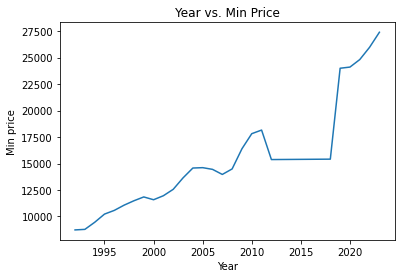

In [ ]:
x_graph = torch.cat((torch.arange(1992,2012), torch.arange(2012,2019), torch.arange(2019,2024)), -1)
y1_min = torch.tensor([8730, 8781, 9449, 10224, 10575, 11070,
                      11485, 11845, 11580, 11960, 12565, 13645,
                      14575, 14610, 14450, 13970, 14490, 16395,
                      17820, 18160,])
y2_min = torch.tensor([24000, 24110, 24820, 25980, 27400])
y_graph_min = torch.cat((y1_min, torch.from_numpy(y_min_hat), y2_min))

plt.plot(x_graph, y_graph_min)
plt.title("Year vs. Min Price");
plt.ylabel('Min price')
plt.xlabel('Year')

plt.show()


### **Plotting graph for year and max price of car**

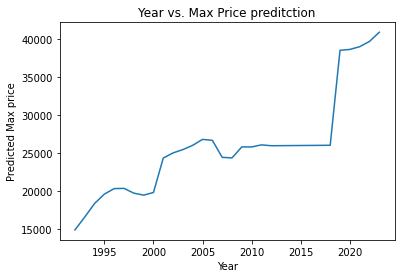

In [ ]:
y1_max = torch.tensor([14840, 16535, 18328, 19571, 20295, 20325,
                      19695, 19435, 19785, 24335, 25010, 25450,
                      26015, 26795, 26670, 24425, 24350, 25805,
                      25800, 26070])
y2_max = torch.tensor([38565, 38675, 39035, 39730, 40945])
y_graph_max = torch.cat((y1_max, torch.from_numpy(y_max_hat), y2_max))

plt.plot(x_graph, y_graph_max)
plt.title("Year vs. Max Price preditction");
plt.ylabel('Predicted Max price')
plt.xlabel('Year')

plt.show()

### **Feature Normalization**

In [ ]:
# Feature Normalization
x = torch.cat((torch.arange(1992.,2012.), torch.arange(2019.,2024.)), -1)
mean = torch.Tensor.mean(x)
std = torch.Tensor.std(x)

x_normalized = (x - mean)/std
print(x_normalized)

tensor([-1.4009, -1.2963, -1.1918, -1.0872, -0.9827, -0.8782, -0.7736, -0.6691,
        -0.5645, -0.4600, -0.3554, -0.2509, -0.1464, -0.0418,  0.0627,  0.1673,
         0.2718,  0.3763,  0.4809,  0.5854,  1.4218,  1.5263,  1.6308,  1.7354,
         1.8399])


### **Using dynamic learning rate for gradient descent**

In [ ]:
def gradient_descent_with_dynamic_learning_rate(x, y, theta_0, theta_1, alpha):
  iterations = 100
  total_loss = np.empty(100)
  m = x.shape[0]
  alpha_initial = alpha

  for i in range(iterations):

    f_x = compute_output(x, theta_0, theta_1)
    total_loss[i] = compute_loss(x, y, theta_0, theta_1)

    print(f"After Iteration {i+1} loss is {total_loss[i]}")

    dj_dtheta_0 = 0
    dj_dtheta_1 = 0

    for i_2 in range(m):
      dj_dtheta_0 = dj_dtheta_0 + f_x[i_2] - y[i_2]
      dj_dtheta_1 = dj_dtheta_1 + (f_x[i_2] - y[i_2]) * x[i_2]

    dj_dtheta_0 = dj_dtheta_0 / m
    dj_dtheta_1 = dj_dtheta_1 / m


    theta_0 = theta_0 - (alpha * dj_dtheta_0)
    theta_1 = theta_1 - (alpha * dj_dtheta_1)

    alpha = (alpha_initial * 20.0)/(i + 1 + 20.0)


  return theta_0, theta_1, total_loss

### **Running linear regression for min car price after feature scaling**

In [ ]:
#Invoking linear regression for minimum car price
theta_0_min = 10000
theta_1_min = 3500
alpha = 1.25
theta_0_min, theta_1_min, total_loss_min = gradient_descent_with_dynamic_learning_rate(x_normalized, y_min, theta_0_min, theta_1_min, alpha)

After Iteration 1 loss is 16661183.0
After Iteration 2 loss is 1466967.875
After Iteration 3 loss is 537401.4375
After Iteration 4 loss is 504379.4375
After Iteration 5 loss is 503776.15625
After Iteration 6 loss is 503771.59375
After Iteration 7 loss is 503771.53125
After Iteration 8 loss is 503771.53125
After Iteration 9 loss is 503771.53125
After Iteration 10 loss is 503771.53125
After Iteration 11 loss is 503771.53125
After Iteration 12 loss is 503771.53125
After Iteration 13 loss is 503771.53125
After Iteration 14 loss is 503771.53125
After Iteration 15 loss is 503771.53125
After Iteration 16 loss is 503771.53125
After Iteration 17 loss is 503771.53125
After Iteration 18 loss is 503771.53125
After Iteration 19 loss is 503771.53125
After Iteration 20 loss is 503771.53125
After Iteration 21 loss is 503771.53125
After Iteration 22 loss is 503771.53125
After Iteration 23 loss is 503771.53125
After Iteration 24 loss is 503771.53125
After Iteration 25 loss is 503771.53125
After Iteratio

### **Running linear regression on max car price after feature scaling**

In [ ]:
#Invoking linear regression for Maximum car price
theta_0_max = 20000
theta_1_max = 2000
alpha = 1.25
theta_0_max, theta_1_max, total_loss_max = gradient_descent_with_dynamic_learning_rate(x_normalized, y_max, theta_0_max, theta_1_max, alpha)

After Iteration 1 loss is 33092378.0
After Iteration 2 loss is 3558102.5
After Iteration 3 loss is 1975573.75
After Iteration 4 loss is 1926040.125
After Iteration 5 loss is 1925227.875
After Iteration 6 loss is 1925222.5
After Iteration 7 loss is 1925222.125
After Iteration 8 loss is 1925222.375
After Iteration 9 loss is 1925222.125
After Iteration 10 loss is 1925222.375
After Iteration 11 loss is 1925222.125
After Iteration 12 loss is 1925222.375
After Iteration 13 loss is 1925222.125
After Iteration 14 loss is 1925222.375
After Iteration 15 loss is 1925222.125
After Iteration 16 loss is 1925222.375
After Iteration 17 loss is 1925222.125
After Iteration 18 loss is 1925222.375
After Iteration 19 loss is 1925222.125
After Iteration 20 loss is 1925222.375
After Iteration 21 loss is 1925222.375
After Iteration 22 loss is 1925222.375
After Iteration 23 loss is 1925222.375
After Iteration 24 loss is 1925222.375
After Iteration 25 loss is 1925222.375
After Iteration 26 loss is 1925222.375
A

### **The total loss has decreased for Min price as well as Max price after using feature scaling and dynamic learning rate.**

### **Plotting graph of Loss for min cost and iteration number after feature scaling**




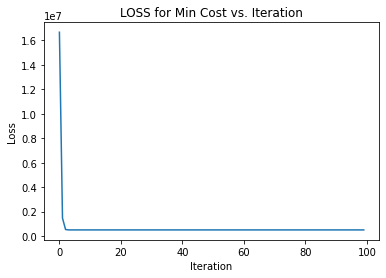

In [ ]:
plt.plot(np.arange(0,100), total_loss_min[0:100])
plt.title("LOSS for Min Cost vs. Iteration");
plt.ylabel('Loss')
plt.xlabel('Iteration')

plt.show()

### **Plotting graph of Loss for max cost and iteration number after feature scaling**

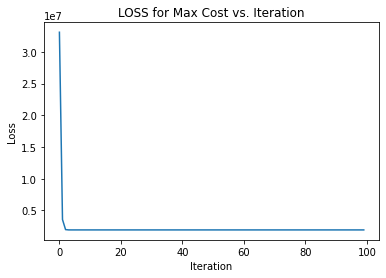

In [ ]:
plt.plot(np.arange(0,100), total_loss_max[0:100])
plt.title("LOSS for Max Cost vs. Iteration");
plt.ylabel('Loss')
plt.xlabel('Iteration')

plt.show()

### **Printing final theta values for min and max price after feature scaling**

In [ ]:
print(f'Final theta_0 value for Min price is {theta_0_min}')
print(f'Final theta_1 value for Min price is {theta_1_min}')
print(f'Final theta_0 value for Max price is {theta_0_max}')
print(f'Final theta_1 value for Max price is {theta_1_max}')

Final theta_0 value for Min price is 15307.57421875
Final theta_1 value for Min price is 5577.79248046875
Final theta_0 value for Max price is 25859.37890625
Final theta_1 value for Max price is 7400.82470703125


### Predicting Min and Max car prices for year 2012-2018 after feature scaling

In [ ]:
x_prediction = torch.arange(2012., 2019.)

x_predicted_normalized = (x_prediction - mean)/std

m = x_prediction.shape[0]
y_min_hat = np.empty(m)
y_max_hat = np.empty(m)

for i in range(m):
  y_min_hat[i] = theta_0_min + theta_1_min * x_predicted_normalized[i]
  y_max_hat[i] = theta_0_max + theta_1_max * x_predicted_normalized[i]

print(f'The predicted min car prices for year 2012 to 2018 are : {y_min_hat}')
print(f'The predicted max car prices for year 2012 to 2018 are : {y_max_hat}')

The predicted min car prices for year 2012 to 2018 are : [19156.09765625 19739.20898438 20322.3203125  20905.43359375
 21488.54492188 22071.65625    22654.76953125]
The predicted max car prices for year 2012 to 2018 are : [30965.74414062 31739.43945312 32513.1328125  33286.828125
 34060.5234375  34834.21875    35607.9140625 ]


### **Plotting graph for year and min price of car after feature scaling**

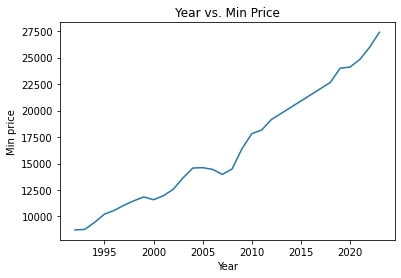

In [ ]:
x_graph = torch.cat((torch.arange(1992,2012), torch.arange(2012,2019), torch.arange(2019,2024)), -1)
y1_min = torch.tensor([8730, 8781, 9449, 10224, 10575, 11070,
                      11485, 11845, 11580, 11960, 12565, 13645,
                      14575, 14610, 14450, 13970, 14490, 16395,
                      17820, 18160])
y2_min = torch.tensor([24000, 24110, 24820, 25980, 27400])
y_graph_min = torch.cat((y1_min, torch.from_numpy(y_min_hat), y2_min))

plt.plot(x_graph, y_graph_min)
plt.title("Year vs. Min Price");
plt.ylabel('Min price')
plt.xlabel('Year')

plt.show()


### **Plotting graph for year and max price of car after feature scaling**

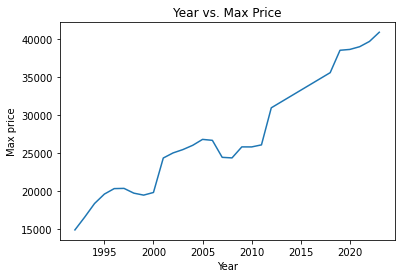

In [ ]:
y1_max = torch.tensor([14840, 16535, 18328, 19571, 20295, 20325,
                      19695, 19435, 19785, 24335, 25010, 25450,
                      26015, 26795, 26670, 24425, 24350, 25805,
                      25800, 26070])
y2_max = torch.tensor([38565, 38675, 39035, 39730, 40945])
y_graph_max = torch.cat((y1_max, torch.from_numpy(y_max_hat), y2_max))
plt.plot(x_graph, y_graph_max)
plt.title("Year vs. Max Price");
plt.ylabel('Max price')
plt.xlabel('Year')

plt.show()

### **Summary :**

-> The price range of next generation ranger predicted by my program for year 2024 is 26,153 - 40,250

-> The final values of theta after training using normalized feature and dynamic learning rate are:

Theta_0 for Min price = 15307.57421875

Theta_1 for Min price = 5577.79248046875

Theta_0 for Max price = 25859.37890625

Theta_1 for Max price = 7400.82470703125

-> The model is predicting better after using Feature scaling and dynamic learning rate

-> According to the prediction of model the price of next generation ranger has not increased by much, therefore, i will buy the ranger

### **Google Colab link : https://colab.research.google.com/drive/1WVKXRYqsiHCR1llyaqo9D02AB4rH9szs?usp=share_link**